In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sys.path.append('/users/mtaranov/genome3D/')
from models_3d import Genome3D_DNN_FC
from utils import normalize_features_sampl_by_f, concat_motifs, get_features, get_labels, subsample_data, normalize_features, reconstruct_2d, printMatrix, binarize, zscore, get_2D, plot_prediction, change_scale
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
contacts='pe'
path='/users/mtaranov/datasets_3d/by_chr_dist_matched_'+contacts+'/'
day='d0'
thres='10'

X_train_node1 = path+'motifs/'+day+'_thres_'+thres+'_train_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_train_node2 = path+'motifs/'+day+'_thres_'+thres+'_train_'+contacts+'_out_node2_3_0.0001/mat.npy'
X_train_window = path+'motifs/'+day+'_thres_'+thres+'_train_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy'


X_test_node1 = path+'motifs/'+day+'_thres_'+thres+'_test_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_test_node2 = path+'motifs/'+day+'_thres_'+thres+'_test_'+contacts+'_out_node2_3_0.0001/mat.npy'
X_test_window = path+'motifs/'+day+'_thres_'+thres+'_test_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy'

X_valid_node1 = path+'motifs/'+day+'_thres_'+thres+'_valid_'+contacts+'_out_node1_3_0.0001/mat.npy'
X_valid_node2 = path+'motifs/'+day+'_thres_'+thres+'_valid_'+contacts+'_out_node2_3_0.0001/mat.npy'
X_valid_window = path+'motifs/'+day+'_thres_'+thres+'_valid_'+contacts+'_out_btw_nodes_3_0.0001/mat.npy'

y_train = get_labels(path+day+'_y_train_thres_'+thres+'.npy')
y_test = get_labels(path+day+'_y_test_thres_'+thres+'.npy')
y_valid = get_labels(path+day+'_y_valid_thres_'+thres+'.npy')

X_train=concat_motifs([X_train_node1, X_train_node2, X_train_window])
X_test=concat_motifs([X_test_node1, X_test_node2, X_test_window])
X_valid=concat_motifs([X_valid_node1, X_valid_node2, X_valid_window])

In [10]:
X_train_pairs = X_train.reshape(X_train.shape[0],X_train.shape[2]*X_train.shape[3])
X_valid_pairs = X_valid.reshape(X_valid.shape[0],X_valid.shape[2]*X_valid.shape[3])
X_test_pairs = X_test.reshape(X_test.shape[0],X_test.shape[2]*X_test.shape[3])

In [11]:
X_train_normalized, X_valid_normalized, X_test_normalized = normalize_features_sampl_by_f(X_train_pairs, X_valid_pairs, X_test_pairs)

# from motifs

In [12]:
dnn_normalized = Genome3D_DNN_FC(num_features=5760, use_deep_CNN=False)
validation_data = (X_valid_normalized, y_valid)
dnn_normalized.train(X_train_normalized, y_train, validation_data)

Training model...
Train on 6710 samples, validate on 1796 samples
Epoch 1/100
6500/6710 [============================>.] - ETA: 0s - loss: 1.3667Epoch 0: validation loss: 0.795
Balanced Accuracy: 57.85%	auROC: 0.691	 auPRC: 0.669
Positve Accuracy: 0.11%	 Negative Accuracy: 27.06%
Recall at 5% | 10% | 25% | 50% FDR: 88.6% | 0.1% | 16.5% | 99.7%	Num Positives: 898	 Num Negatives: 898


6710/6710 [==============================] - 7s - loss: 1.3626 - val_loss: 0.7945
Epoch 2/100
6500/6710 [============================>.] - ETA: 0s - loss: 1.0028Epoch 1: validation loss: 0.685
Balanced Accuracy: 64.37%	auROC: 0.723	 auPRC: 0.706
Positve Accuracy: 0.00%	 Negative Accuracy: 44.65%
Recall at 5% | 10% | 25% | 50% FDR: 84.1% | 0.0% | 41.5% | 100.0%	Num Positives: 898	 Num Negatives: 898


6710/6710 [==============================] - 7s - loss: 0.9979 - val_loss: 0.6853
Epoch 3/100
6500/6710 [============================>.] - ETA: 0s - loss: 0.7963Epoch 2: validation loss: 0.632
Balanced Accurac

In [13]:
print(dnn_normalized.test(X_test_normalized, y_test))
print(dnn_normalized.test(X_train_normalized, y_train))
print(dnn_normalized.test(X_valid_normalized, y_valid))

Balanced Accuracy: 65.69%	auROC: 0.707	 auPRC: 0.696
Positve Accuracy: 2.23%	 Negative Accuracy: 74.29%
Recall at 5% | 10% | 25% | 50% FDR: 57.1% | 2.4% | 29.8% | 100.0%	Num Positives: 494	 Num Negatives: 494

Balanced Accuracy: 100.00%	auROC: 1.000	 auPRC: 1.000
Positve Accuracy: 100.00%	 Negative Accuracy: 100.00%
Recall at 5% | 10% | 25% | 50% FDR: 100.0% | 100.0% | 100.0% | 100.0%	Num Positives: 3355	 Num Negatives: 3355

Balanced Accuracy: 68.76%	auROC: 0.752	 auPRC: 0.744
Positve Accuracy: 0.11%	 Negative Accuracy: 75.84%
Recall at 5% | 10% | 25% | 50% FDR: 61.7% | 15.3% | 46.5% | 100.0%	Num Positives: 898	 Num Negatives: 898



# DeepLift on Train

In [20]:
preds_train = dnn_normalized.predict(X_train_normalized)

In [24]:
#save model and weights
dnn_normalized.save(contacts+'_dnn_FC_seq_features_nodes_and_edges_'+'thres_'+thres, '/users/mtaranov/genome3D/')

In [27]:
weights='/users/mtaranov/genome3D/model_weights/'+contacts+'_dnn_FC_seq_features_nodes_and_edges_'+'thres_'+thres+'.weights.h5'
json_model='/users/mtaranov/genome3D/models/'+contacts+'_dnn_FC_seq_features_nodes_and_edges_'+'thres_'+thres+'.arch.json'

In [28]:
scores = dnn_normalized.deeplift(X_train_normalized[np.where(y_train[np.where(preds_train>0.9)[0]] ==1)[0]], weights, json_model, batch_size=128)

True
nonlinear_mxts_mode is set to: RevealCancel


In [30]:
np.save('/users/mtaranov/genome3D/model_deeplift_scores/'+contacts+'_scores_dnn_FC_seq_features_nodes_and_edges.npy', scores)

In [31]:
motif_names=np.loadtxt('/users/mtaranov/datasets_3d/dist_matched_pe/motifs/d0_thres_0_test_pe_out_btw_nodes_3_0.0001/motif_names.txt', dtype=str, delimiter='/')[:,6:].reshape(640,)
top_3_hits_names=[]
for i in motif_names:
    for j in range(3):
        top_3_hits_names.append(i)
top_3_hits_names = np.array(top_3_hits_names)

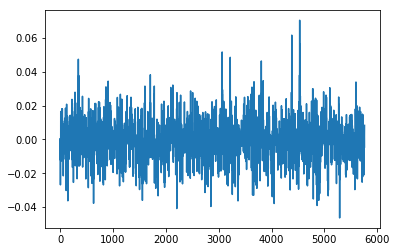

In [32]:
plt.plot(np.mean(scores, axis=0))

In [33]:
# plt.pcolor(scores, cmap='hot', vmin=np.min(scores), vmax=np.max(scores)) # cmap='RdBu'
# plt.xlabel('motifs/features')
# plt.ylabel('examples')
# plt.title('DeepLift Score - Window Motifs')
# plt.colorbar()

In [34]:
score_per_feature_node1=np.mean(scores[:,0:5760:3], axis=0)
score_per_feature_node2=np.mean(scores[:,1:5761:3], axis=0)
score_per_feature_window=np.mean(scores[:,2:5762:3], axis=0)

In [35]:
score_per_feature_node1.shape

(1920,)

In [36]:
DeepLift_Motifs_node1=top_3_hits_names[score_per_feature_node1.argsort()[::-1]]
DeepLift_Motifs_node2=top_3_hits_names[score_per_feature_node2.argsort()[::-1]]
DeepLift_Motifs_window=top_3_hits_names[score_per_feature_window.argsort()[::-1]]

In [37]:
print np.where(DeepLift_Motifs_node1=='CTCF_HUMAN')
print np.where(DeepLift_Motifs_node1=='CTCFL_HUMAN')

(array([ 376, 1136, 1683]),)
(array([ 651,  722, 1371]),)


In [38]:
print np.where(DeepLift_Motifs_node2=='CTCF_HUMAN')
print np.where(DeepLift_Motifs_node2=='CTCFL_HUMAN')

(array([ 850, 1017, 1794]),)
(array([ 421,  952, 1227]),)


In [39]:
print np.where(DeepLift_Motifs_window=='CTCF_HUMAN')
print np.where(DeepLift_Motifs_window=='CTCFL_HUMAN')

(array([1560, 1909, 1916]),)
(array([ 574,  722, 1177]),)


In [40]:
# for i, item in enumerate(DeepLift_Window_Motifs_node1[:100]):
#     print i, item
DeepLift_Motifs_node1[:100]

array(['NFAC1_HUMAN', 'GLIS3_HUMAN', 'ESR2_HUMAN', 'CR3L1_HUMAN',
       'ZKSC3_HUMAN', 'PO6F1_HUMAN', 'NOBOX_HUMAN', 'HEN1_HUMAN',
       'TFDP1_HUMAN', 'TFE2_HUMAN', 'PIT1_HUMAN', 'TF7L1_HUMAN',
       'KLF14_HUMAN', 'PO3F1_HUMAN', 'TBX21_HUMAN', 'TGIF1_HUMAN',
       'PO3F2_HUMAN', 'VDR_HUMAN', 'PRGR_HUMAN', 'ATF2_HUMAN',
       'FOSL1_HUMAN', 'COT1_HUMAN', 'BATF_HUMAN', 'PO3F3_HUMAN',
       'BPTF_HUMAN', 'GSX2_HUMAN', 'MLX_HUMAN', 'MEF2D_HUMAN',
       'ETV5_HUMAN', 'FOXC1_HUMAN', 'TF7L1_HUMAN', 'RARG_HUMAN',
       'FEV_HUMAN', 'P73_HUMAN', 'RX_HUMAN', 'DUXA_HUMAN', 'GLIS3_HUMAN',
       'RXRB_HUMAN', 'NR2C1_HUMAN', 'TBX3_HUMAN', 'SP1_HUMAN',
       'PHX2B_HUMAN', 'MNT_HUMAN', 'GCM1_HUMAN', 'DUXA_HUMAN',
       'ELK4_HUMAN', 'ZN232_HUMAN', 'REL_HUMAN', 'ZN740_HUMAN',
       'ESR2_HUMAN', 'ETV3_HUMAN', 'ZSCA4_HUMAN', 'GABPA_HUMAN',
       'HEN1_HUMAN', 'HBP1_HUMAN', 'TFDP1_HUMAN', 'TBR1_HUMAN',
       'NFKB2_HUMAN', 'MGAP_HUMAN', 'MLX_HUMAN', 'NR4A2_HUMAN',
       'NR2E3_HUMAN', '

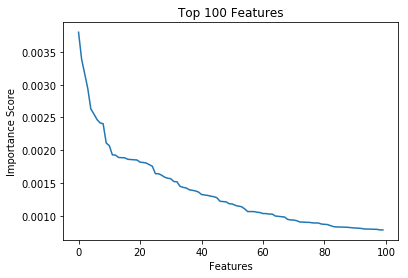

In [41]:
plt.plot(sorted(score_per_feature_node1)[::-1][:100])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 100 Features')

In [42]:
DeepLift_Motifs_node2[:100]

array(['TEAD4_HUMAN', 'HXB6_HUMAN', 'ELF3_HUMAN', 'LHX8_HUMAN',
       'GATA4_HUMAN', 'FUBP1_HUMAN', 'HXB6_HUMAN', 'TGIF1_HUMAN',
       'VDR_HUMAN', 'MEOX1_HUMAN', 'TBR1_HUMAN', 'PO3F2_HUMAN',
       'SOX13_HUMAN', 'TYY1_HUMAN', 'GATA4_HUMAN', 'ELF5_HUMAN',
       'CLOCK_HUMAN', 'ESR2_HUMAN', 'ZKSC3_HUMAN', 'KLF16_HUMAN',
       'HBP1_HUMAN', 'ETV2_HUMAN', 'BATF_HUMAN', 'NR2C1_HUMAN',
       'TFDP1_HUMAN', 'HXD8_HUMAN', 'NRL_HUMAN', 'HEY1_HUMAN',
       'NFKB1_HUMAN', 'MEF2C_HUMAN', 'PPARA_HUMAN', 'BARH1_HUMAN',
       'NFKB1_HUMAN', 'BPTF_HUMAN', 'NR2C2_HUMAN', 'HMX3_HUMAN',
       'HBP1_HUMAN', 'EGR4_HUMAN', 'FLI1_HUMAN', 'TBX3_HUMAN',
       'TBX3_HUMAN', 'PO3F2_HUMAN', 'NR1H2_HUMAN', 'SPDEF_HUMAN',
       'ZN143_HUMAN', 'NANOG_HUMAN', 'LMX1B_HUMAN', 'P53_HUMAN',
       'CEBPB_HUMAN', 'NKX21_HUMAN', 'ZN384_HUMAN', 'STF1_HUMAN',
       'RUNX2_HUMAN', 'HXB6_HUMAN', 'FOXD3_HUMAN', 'HXA10_HUMAN',
       'TBX4_HUMAN', 'ZN524_HUMAN', 'NR2C2_HUMAN', 'ARNT_HUMAN',
       'STAT1_HUMAN', 'HE

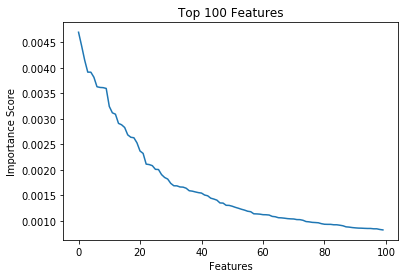

In [43]:
plt.plot(sorted(score_per_feature_node2)[::-1][:100])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 100 Features')

In [44]:
DeepLift_Motifs_window[:100]

array(['HXB6_HUMAN', 'PAX1_HUMAN', 'HXB6_HUMAN', 'ELF3_HUMAN',
       'TYY1_HUMAN', 'ZN589_HUMAN', 'ELF3_HUMAN', 'ZBT18_HUMAN',
       'TYY1_HUMAN', 'MAFA_HUMAN', 'HXB6_HUMAN', 'ZN589_HUMAN',
       'PAX4_HUMAN', 'HXC11_HUMAN', 'CDX1_HUMAN', 'PBX2_HUMAN',
       'UBIP1_HUMAN', 'SRBP2_HUMAN', 'LHX2_HUMAN', 'ESR2_HUMAN',
       'GLI1_HUMAN', 'FOXD3_HUMAN', 'PAX2_HUMAN', 'IRF5_HUMAN',
       'XBP1_HUMAN', 'SMAD1_HUMAN', 'HLTF_HUMAN', 'HLF_HUMAN',
       'MGAP_HUMAN', 'HXD8_HUMAN', 'PAX1_HUMAN', 'HXD3_HUMAN',
       'PAX8_HUMAN', 'ZBT18_HUMAN', 'PAX4_HUMAN', 'ESR2_HUMAN',
       'ELF3_HUMAN', 'SRY_HUMAN', 'MYBB_HUMAN', 'SRBP2_HUMAN',
       'PAX7_HUMAN', 'VDR_HUMAN', 'THB_HUMAN', 'FOXJ2_HUMAN',
       'CLOCK_HUMAN', 'LMX1A_HUMAN', 'NDF2_HUMAN', 'NGN2_HUMAN',
       'BHE23_HUMAN', 'PIT1_HUMAN', 'TFE2_HUMAN', 'PROX1_HUMAN',
       'SP2_HUMAN', 'HMGA1_HUMAN', 'NR0B1_HUMAN', 'PRDM4_HUMAN',
       'GATA3_HUMAN', 'NFKB1_HUMAN', 'EVX2_HUMAN', 'PPARD_HUMAN',
       'FUBP1_HUMAN', 'MEF2C_HUMAN', 'F

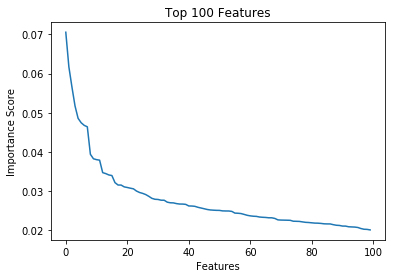

In [45]:
plt.plot(sorted(score_per_feature_window)[::-1][:100])
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 100 Features')

In [47]:
from sets import Set
uniq_node1 = Set(DeepLift_Motifs_node1[:100])
uniq_node2 = Set(DeepLift_Motifs_node2[:100])
uniq_window = Set(DeepLift_Motifs_window[:100])

/users/mtaranov/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


In [48]:
uniq_node1 & uniq_node2

Set(['VDR_HUMAN', 'NKX21_HUMAN', 'TBX3_HUMAN', 'P53_HUMAN', 'ZKSC3_HUMAN', 'FOXD3_HUMAN', 'NR2E3_HUMAN', 'ZN143_HUMAN', 'PHX2B_HUMAN', 'NRL_HUMAN', 'ELF5_HUMAN', 'THB_HUMAN', 'PO3F1_HUMAN', 'TBR1_HUMAN', 'HEN1_HUMAN', 'HBP1_HUMAN', 'BATF_HUMAN', 'BPTF_HUMAN', 'TGIF1_HUMAN', 'PO3F2_HUMAN', 'NANOG_HUMAN', 'ESR2_HUMAN', 'TFDP1_HUMAN', 'ETV2_HUMAN', 'RUNX2_HUMAN', 'NR2C1_HUMAN'])

In [49]:
uniq_node1 & uniq_node2 & uniq_window

Set(['THB_HUMAN', 'NR2E3_HUMAN', 'ESR2_HUMAN', 'FOXD3_HUMAN', 'VDR_HUMAN'])